<img src="ehtplogo.jpg" alt="Drawing" style="width: 300px;"/>

#  Analyse et prediction du désabonnement des clients

## - Introduction 

Les programmes d'abonnement sont souvent la principale source de revenus des entreprises de tous les secteurs. Il peut s'agir d'entreprises de télécommunications, de sociétés SaaS ou de toute autre entreprise qui vend un service moyennant un abonnement mensuelle.  

Il existe trois stratégies possibles que ces entreprises peuvent utiliser pour générer davantage de revenus : acquérir davantage de clients, vendre plus cher les clients existants, ou augmenter la fidélisation de la clientèle. 

Quelle que soit la manière dont elles structurent leurs adhésions ou le secteur dans lequel elles opèrent, les entreprises essaient presque toujours de minimiser les annulations d'abonnement. Pour fidéliser leurs clients, ces entreprises doivent d'abord identifier les modèles comportementaux qui agissent comme un catalyseur du désengagement vis-à-vis du produit. 


### Objectif et Methodologie : 

Objectif : Nous sommes chargés d'identifier les utilisateurs susceptibles de résilier leur abonnement . L'objectif de ce modèle est donc de prévoir quels utilisateurs sont susceptibles de résilier leur abonnement afin que l'entreprise puisse se concentrer sur le réengagement de ces utilisateurs avec le produit. Ces efforts peuvent porter sur des caractéristiques nouvelles ou que l'utilisateur a montré qu'il appréciait.

Dans cette étude de cas, nous travaillerons pour une entreprise fintech qui fournit à ses utilisateurs un produit d'abonnement qui leur permet de gérer leurs comptes bancaires. 

Le processus est le suivant :

1. Rassembler ou collecter les données historiques sur les clients dans un fichier CSV ou EXCEL;
2. Comprendre les donnees;
3. Prétraitement des données, feature engineering, features selection;
4. Construire des modèles prédictifs et les entrainer;
5. Évaluater de chaque model et optimiser le model candidat;
6. Utiliser le modèle sur chaque client actuel pour prédire s'il risque de se desabonner.

## -  Data

### Source : 

Les données ont été obtenues à partir de la plateforme Kaggle. Ce sont des donnees d'une société fintech MoneyLion qui fournit à ses utilisateurs un produit d'abonnement qui leur permet de gérer leurs comptes bancaires. En souscrivant à l'abonnement, les clients fournissent des données sur leurs finances, ainsi que sur la manière dont ils gèrent ces finances par le biais du produit.

### Structure Generale : 

Notre dataset contient 48079 observations et 27 variables ou colonnes , dont 12 numeriques et 15 categoriques. 

* userid - MongoDB userid
* churn  - Active = No | Suspended < 30 = No Else Churn = Yes
* age - age of the customer
* rent_or_own - Does the customer rents or owns a house 
* trivia_played - How many times a user played trivia 
* trivia_shared_results- How many times a user shared trivia results 
* trivia_view_unlocked- How many times a user viewed trivia view unlocked screen
* trivia_view_results-How many times a user viewed trivia results
* cards_share- How many times a user shared his cards
* cards_viewed- How many times a user viewed the cards
* cards_helpful- How helpful was the cards
* cards_not_helpful- How helpful was the cards
* cards_clicked - How many times a user has clicked the cards
* has_used_mobile - as the user used MoneyLion  app
* has_used_web - Has the user used MoneyLion Web app
* used_android - Has the user used a android based phone
* used_ios- Has the user used an iphone
* more_than_one_mobile_device - does the customer use more than one mobile device
* payFreq- Pay Frequency of the cusomter
* loan_pending - is the loan pending
* withdrawn_application - has the customer withdrawn the loan applicaiton 
* paid_off_loan- has the customer paid of the loan
* did_not_accept_funding - customer did not accept funding
* zodiac_sign- zodiac sign of the customer
* un_linked_account - Has the user un linked account
* re_linked_account- Has the user re linked account
* cash_back_engagement - Sum of cash back dollars received by a customer / No of days in the app
* has_reffered- Has the user referred






-----

## - Code : 

### Etape 1 : Collecte et telechargement des donnees 

In [255]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import random

In [256]:
%matplotlib inline

In [257]:
data1 = pd.read_csv('new_churn_data.csv')

In [258]:
data1.shape

(48079, 28)

In [259]:
pd.set_option('display.max_columns', None)

In [260]:
data1.shape

(48079, 28)

In [261]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48079 entries, 0 to 48078
Data columns (total 28 columns):
userid                         48079 non-null int64
churn                          48079 non-null int64
age                            48079 non-null float64
rent_or_own                    48079 non-null object
trivia_played                  48079 non-null int64
trivia_shared_results          48079 non-null int64
trivia_view_unlocked           48079 non-null int64
trivia_view_results            48079 non-null int64
cards_share                    48079 non-null int64
cards_viewed                   48079 non-null int64
cards_helpful                  48079 non-null int64
cards_not_helpful              48079 non-null int64
cards_clicked                  48079 non-null int64
has_used_mobile                48079 non-null int64
has_used_web                   48079 non-null int64
used_android                   48079 non-null int64
used_ios                       48079 non-null int64
more

In [262]:
data1.head()

,userid,churn,age,rent_or_own,trivia_played,trivia_shared_results,trivia_view_unlocked,trivia_view_results,cards_share,cards_viewed,cards_helpful,cards_not_helpful,cards_clicked,has_used_mobile,has_used_web,used_android,used_ios,more_than_one_mobile_device,payfreq,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,zodiac_sign,un_linked_account,re_linked_account,cash_back_engagement,has_referred
0,0,1,22.0,na,0,0,0,0,0,48,0,0,11,1,1,0,1,3,Weekly,0,0,0,0,Taurus,0,0,0.57,0
1,7,1,25.0,R,0,0,5,0,0,5,0,0,1,1,1,1,0,0,Weekly,0,0,0,0,Gemini,0,0,0.07,0
2,8,1,32.0,na,0,0,0,0,0,49,0,0,2,1,0,0,1,0,Bi-Weekly,0,0,0,0,Virgo,0,0,0.60,1
3,18,1,26.0,na,0,0,169,0,0,184,0,0,10,1,1,0,1,2,na,0,0,0,0,Leo,0,0,1.77,1
4,19,1,28.0,R,0,0,11,0,0,65,0,0,0,1,0,0,1,0,na,0,0,0,0,Cancer,0,0,1.23,1


### Etape 2 : Comprendre les donnees 

In [263]:
import seaborn as sns

In [264]:
data1.nunique()

userid                         41389
churn                              2
age                               75
rent_or_own                        3
trivia_played                     65
trivia_shared_results             21
trivia_view_unlocked             324
trivia_view_results               62
cards_share                       16
cards_viewed                     328
cards_helpful                     27
cards_not_helpful                 12
cards_clicked                    145
has_used_mobile                    2
has_used_web                       2
used_android                       2
used_ios                           2
more_than_one_mobile_device        5
payfreq                            5
loan_pending                       2
withdrawn_application              2
paid_off_loan                      2
did_not_accept_funding             2
zodiac_sign                       13
un_linked_account                  2
re_linked_account                  2
cash_back_engagement             209
h

In [265]:
data1.isna().any()

userid                         False
churn                          False
age                            False
rent_or_own                    False
trivia_played                  False
trivia_shared_results          False
trivia_view_unlocked           False
trivia_view_results            False
cards_share                    False
cards_viewed                   False
cards_helpful                  False
cards_not_helpful              False
cards_clicked                  False
has_used_mobile                False
has_used_web                   False
used_android                   False
used_ios                       False
more_than_one_mobile_device    False
payfreq                        False
loan_pending                   False
withdrawn_application          False
paid_off_loan                  False
did_not_accept_funding         False
zodiac_sign                    False
un_linked_account              False
re_linked_account              False
cash_back_engagement           False
h

In [477]:
#Split feature to categoricals and numericals

In [267]:
categoricals = [col for col in data1.columns if data1[col].dtype == 'O']
numericals = []
unknown = []

In [268]:
for i in data1.columns : 
    if i not in categoricals : 
        if data1[i].nunique() <= 10 :
            categoricals.append(i)
        elif data1[i].dtype == 'float' :
            numericals.append(i)
        else :
            unknown.append(i)

In [269]:
unknown

['userid',
 'trivia_played',
 'trivia_shared_results',
 'trivia_view_unlocked',
 'trivia_view_results',
 'cards_share',
 'cards_viewed',
 'cards_helpful',
 'cards_not_helpful',
 'cards_clicked']

In [270]:
categoricals

['rent_or_own',
 'payfreq',
 'zodiac_sign',
 'churn',
 'has_used_mobile',
 'has_used_web',
 'used_android',
 'used_ios',
 'more_than_one_mobile_device',
 'loan_pending',
 'withdrawn_application',
 'paid_off_loan',
 'did_not_accept_funding',
 'un_linked_account',
 're_linked_account',
 'has_referred']

In [271]:
numericals.extend(unknown)

In [272]:
numericals

['age',
 'cash_back_engagement',
 'userid',
 'trivia_played',
 'trivia_shared_results',
 'trivia_view_unlocked',
 'trivia_view_results',
 'cards_share',
 'cards_viewed',
 'cards_helpful',
 'cards_not_helpful',
 'cards_clicked']

In [360]:
len(categoricals)

15

Correlation between numeric variables : 

In [274]:
data1[numericals].corr()

,age,cash_back_engagement,userid,trivia_played,trivia_shared_results,trivia_view_unlocked,trivia_view_results,cards_share,cards_viewed,cards_helpful,cards_not_helpful,cards_clicked
age,1.000000,0.087582,-0.013435,0.079261,0.038909,-0.002580,0.078930,0.079733,0.098626,0.022700,0.005913,0.163674
cash_back_engagement,0.087582,1.000000,-0.484840,0.266277,0.122938,0.436285,0.266561,0.146281,0.876664,0.053632,0.074931,0.513032
userid,-0.013435,-0.484840,1.000000,-0.172218,-0.098494,-0.293851,-0.172248,-0.074910,-0.514910,-0.028120,-0.037567,-0.308966
trivia_played,0.079261,0.266277,-0.172218,1.000000,0.493181,0.334711,0.998207,-0.046864,0.379529,-0.007818,-0.014538,0.443549
trivia_shared_results,0.038909,0.122938,-0.098494,0.493181,1.000000,0.225405,0.493827,-0.040656,0.188596,-0.006602,-0.010022,0.294447
trivia_view_unlocked,-0.002580,0.436285,-0.293851,0.334711,0.225405,1.000000,0.333990,-0.100158,0.599895,-0.027200,-0.040516,0.391549
trivia_view_results,0.078930,0.266561,-0.172248,0.998207,0.493827,0.333990,1.000000,-0.046891,0.379791,-0.007715,-0.014675,0.443463
cards_share,0.079733,0.146281,-0.074910,-0.046864,-0.040656,-0.100158,-0.046891,1.000000,0.110198,0.116982,0.159702,0.171828
cards_viewed,0.098626,0.876664,-0.514910,0.379529,0.188596,0.599895,0.379791,0.110198,1.000000,0.047303,0.068662,0.612406
cards_helpful,0.022700,0.053632,-0.028120,-0.007818,-0.006602,-0.027200,-0.007715,0.116982,0.047303,1.000000,0.060583,0.096119


- We can see that feature 'cash_back_engagement' is correlated with 'cards_viewed'
- Also the feature 'trivia_played' is highly correlated with 'trivia_view_results' 

In [275]:
ls_plot = numericals.copy()

In [276]:
ls_plot.append('churn')

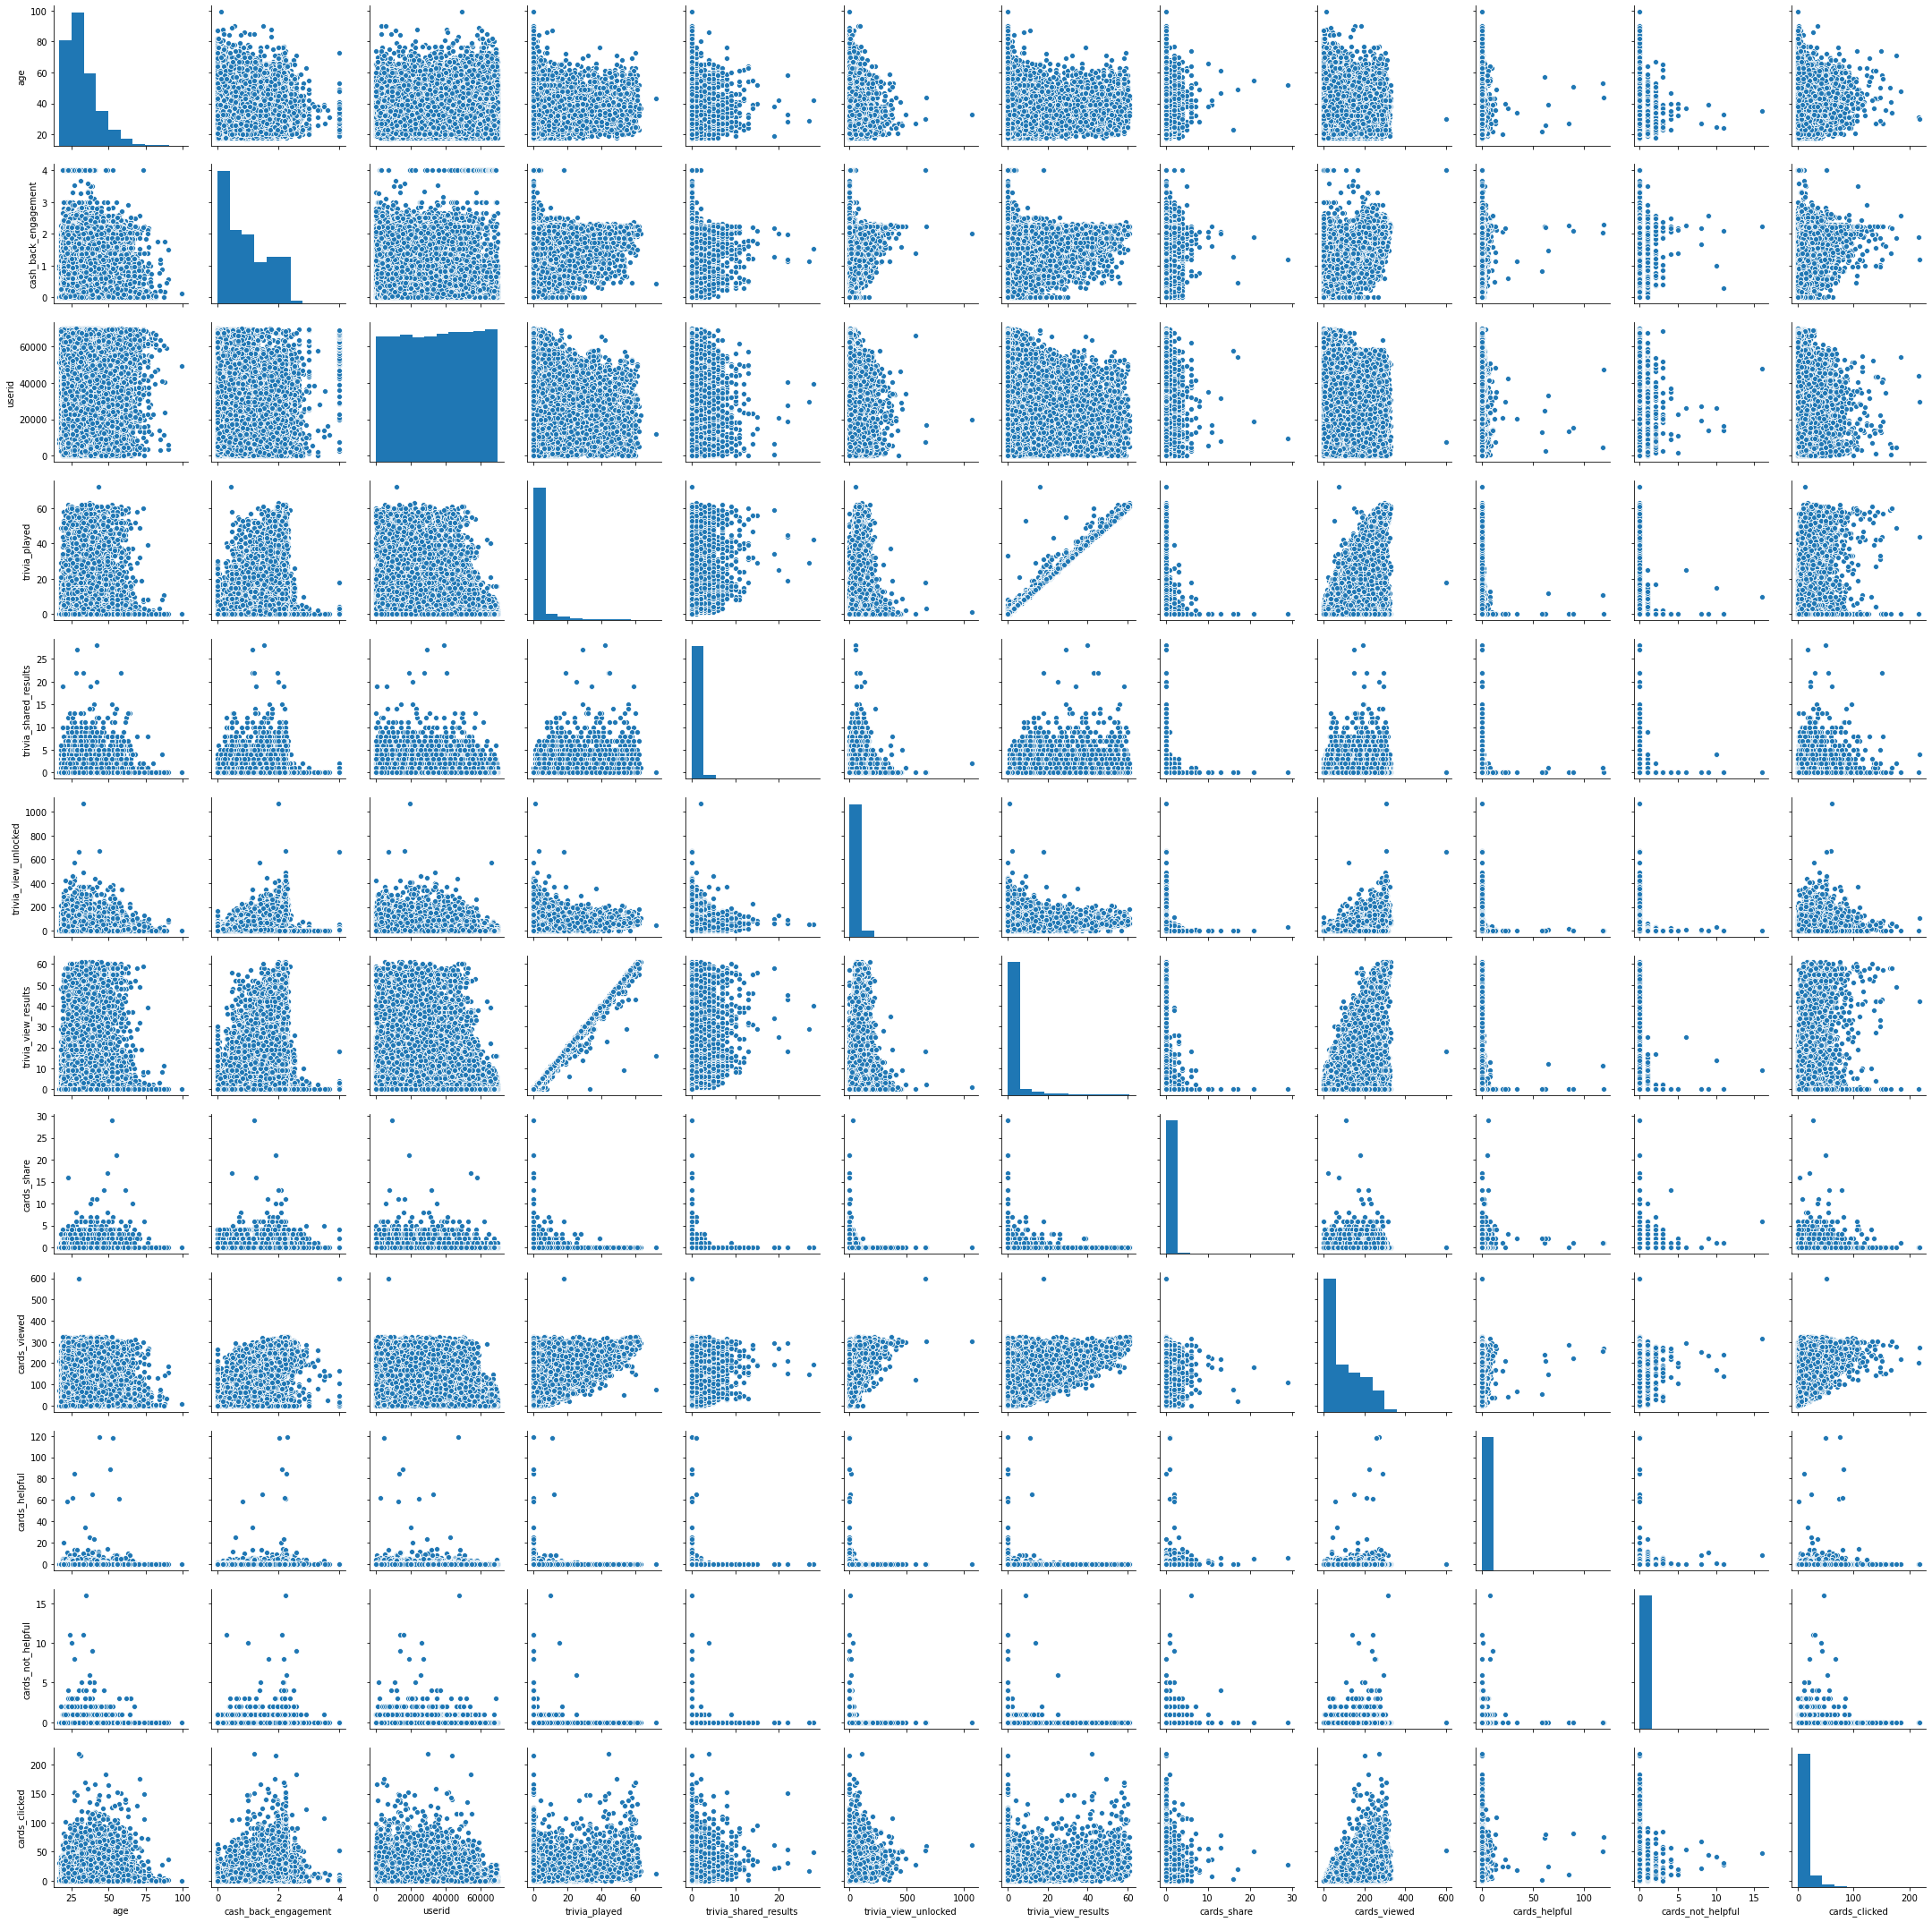

In [277]:
sns.pairplot(data1[numericals])

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


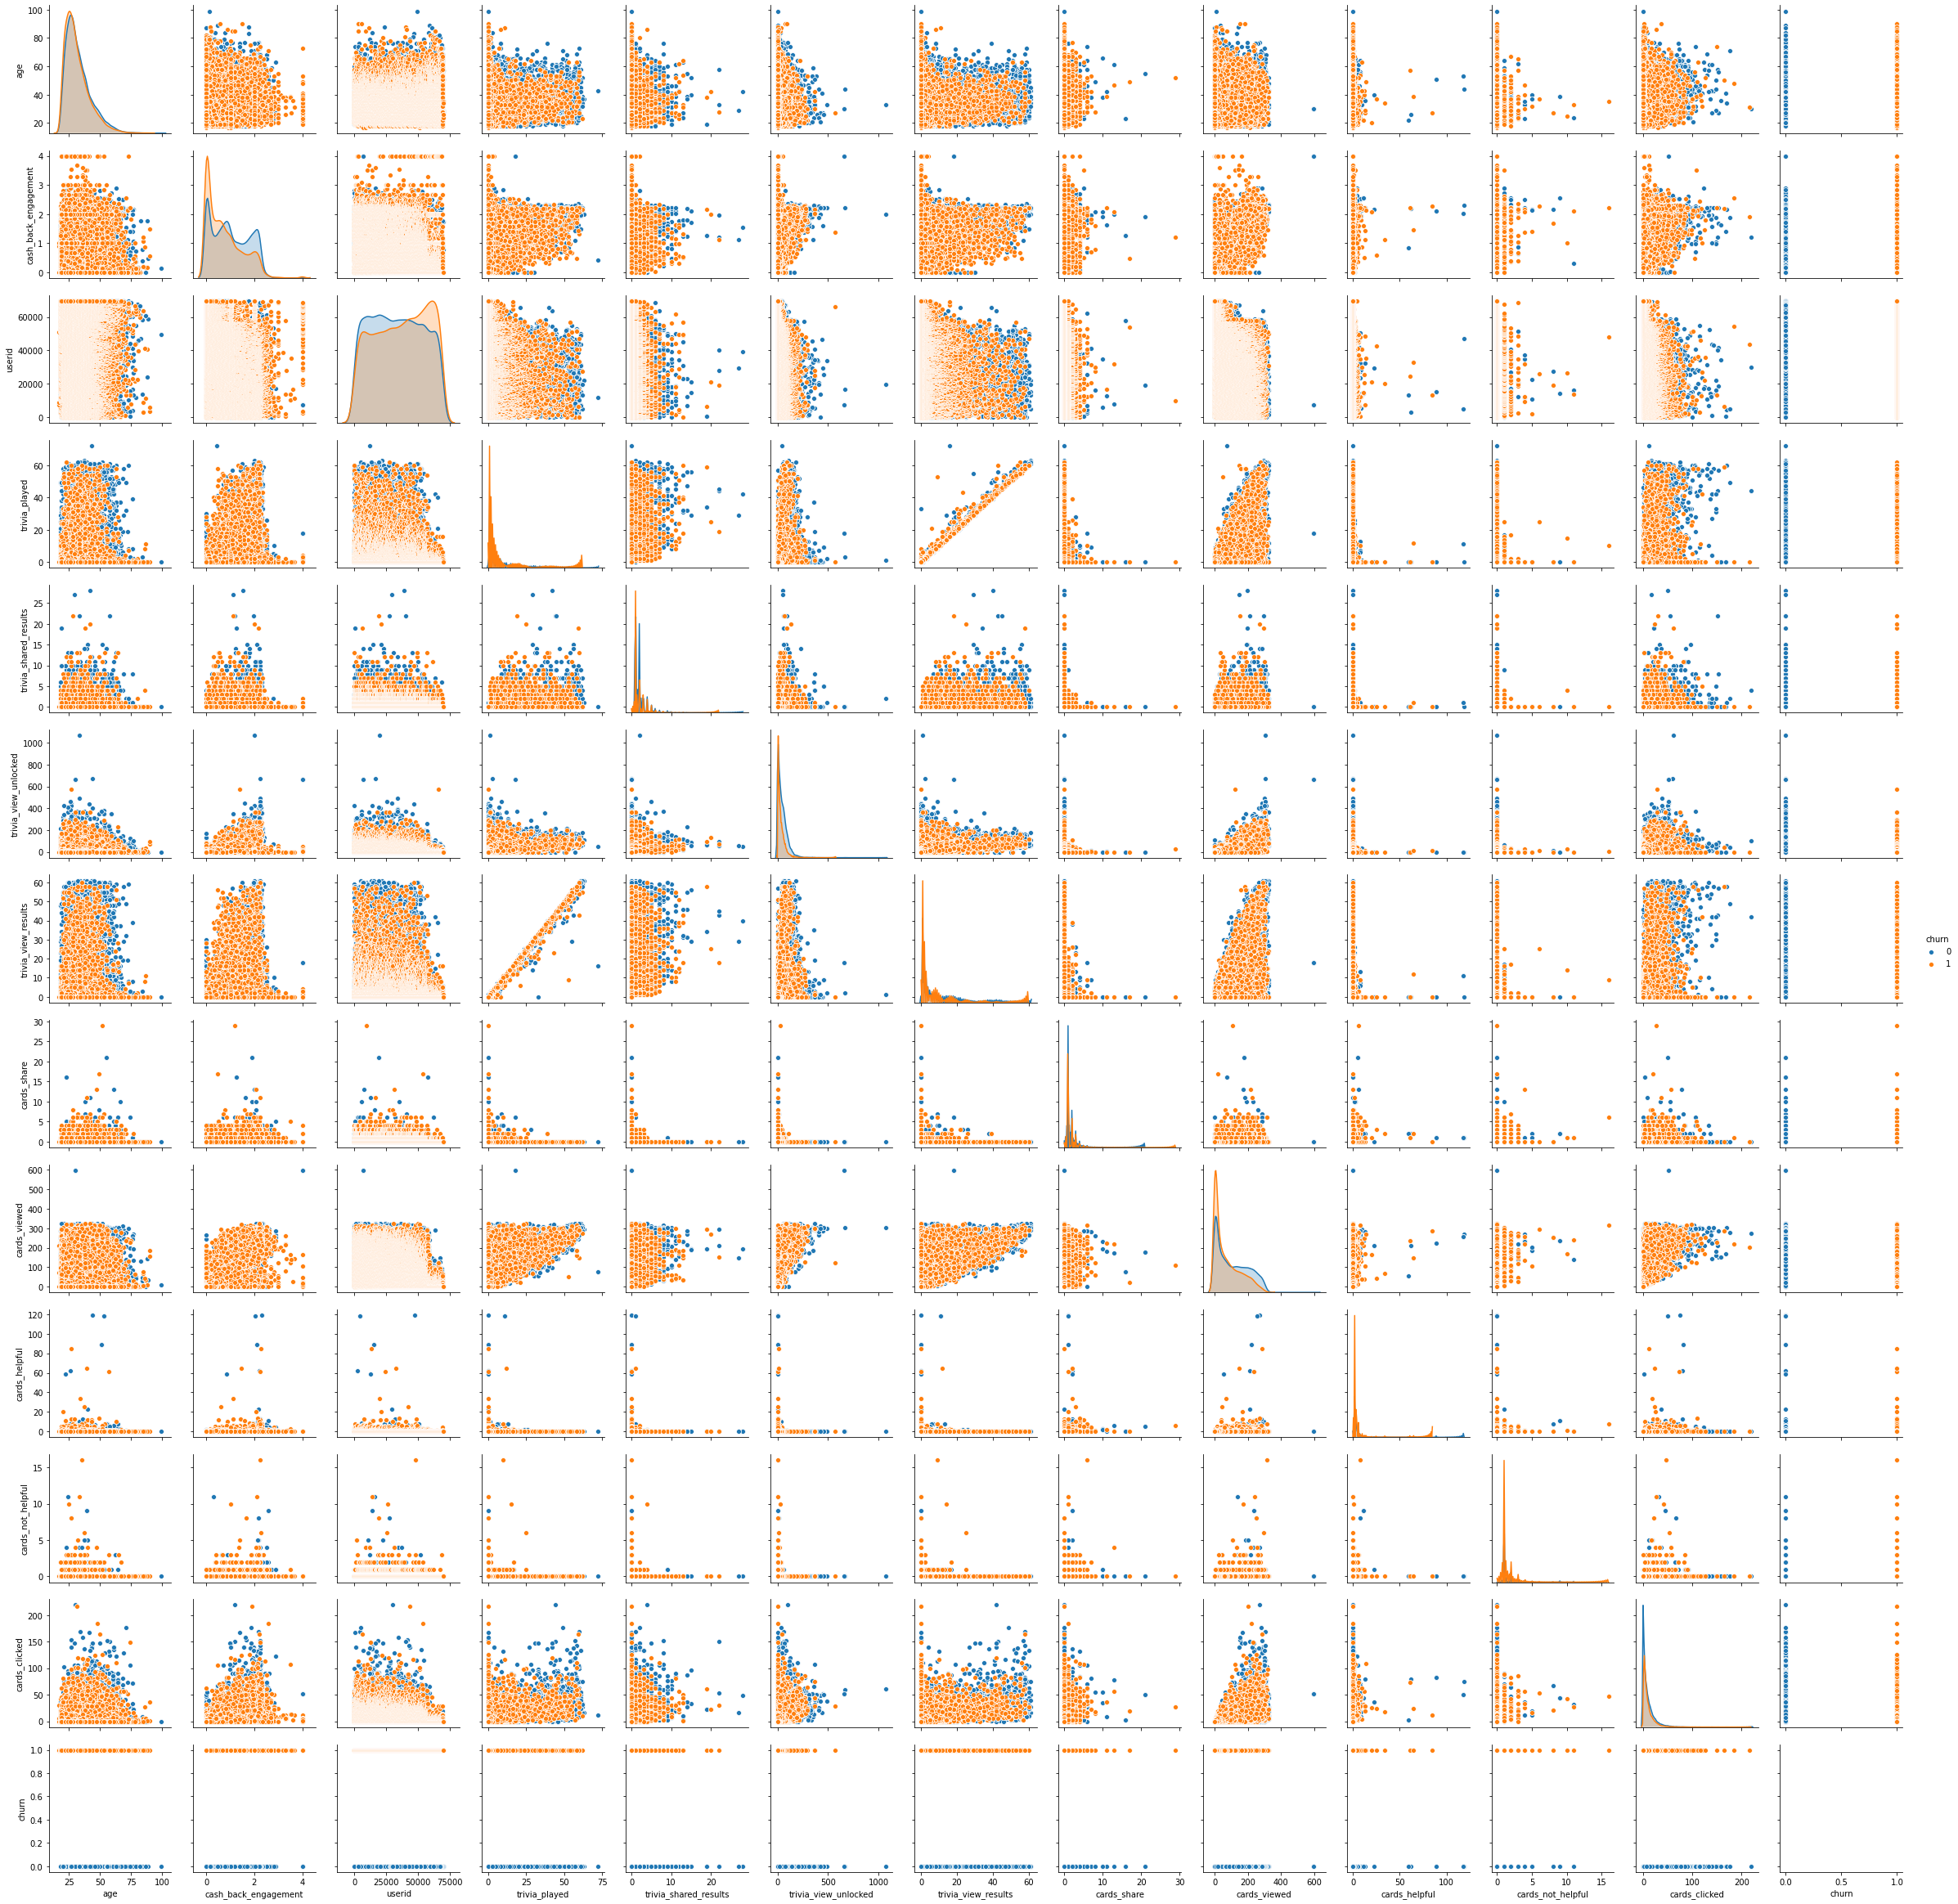

In [31]:
sns.pairplot(data1[ls_plot], hue='churn')

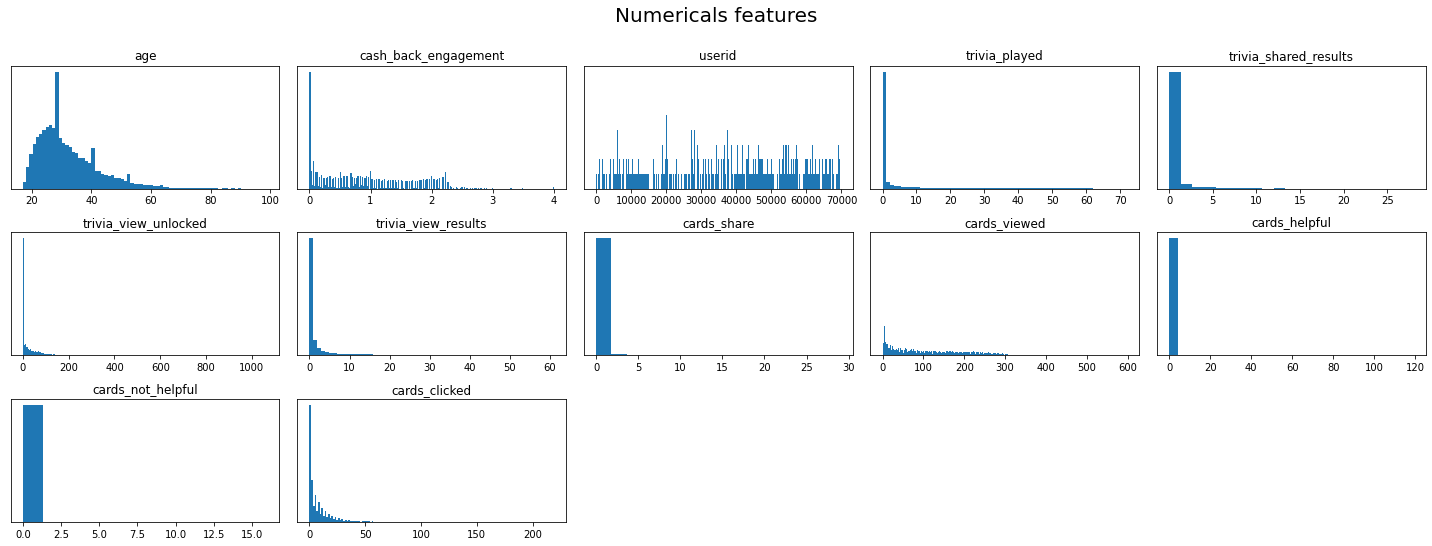

In [32]:
fig = plt.figure(figsize=(20,15))
plt.suptitle('Numericals features', fontsize=20)
for i in range(1, data1[numericals].shape[1] + 1) :
    plt.subplot(6,5,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data1[numericals].columns.values[i-1])
    
    vals = np.size(data1[numericals].iloc[:,i-1].unique())
    plt.hist(data1[numericals].iloc[:,i-1], bins=vals)

plt.tight_layout(rect= [0, 0.03, 1, 0.95])


### Etape 3 : Prétraitement des données, feature engineering, features selection;

In [278]:
#drop user id & correlated columns
data1.drop(['cash_back_engagement', 'trivia_view_results'],axis=1 , inplace=True)
numericals.remove('cash_back_engagement')
numericals.remove('trivia_view_results')
categoricals.remove('churn')

In [280]:
from sklearn.model_selection import train_test_split

In [165]:
#split the dataset to train and test 

In [361]:
X = data1.drop('churn', axis=1).copy()
y = data1['churn'].copy()

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [363]:
X_train.shape

(33655, 25)

In [364]:
X_test.shape

(14424, 25)

In [365]:
X.columns

Index(['userid', 'age', 'rent_or_own', 'trivia_played',
       'trivia_shared_results', 'trivia_view_unlocked', 'cards_share',
       'cards_viewed', 'cards_helpful', 'cards_not_helpful', 'cards_clicked',
       'has_used_mobile', 'has_used_web', 'used_android', 'used_ios',
       'more_than_one_mobile_device', 'payfreq', 'loan_pending',
       'withdrawn_application', 'paid_off_loan', 'did_not_accept_funding',
       'zodiac_sign', 'un_linked_account', 're_linked_account',
       'has_referred'],
      dtype='object')

#### Preprocessing of categorical features (feature engineering)

In [367]:
X_train[categoricals].nunique()

rent_or_own                     3
payfreq                         5
zodiac_sign                    13
has_used_mobile                 2
has_used_web                    2
used_android                    2
used_ios                        2
more_than_one_mobile_device     5
loan_pending                    2
withdrawn_application           2
paid_off_loan                   2
did_not_accept_funding          2
un_linked_account               2
re_linked_account               2
has_referred                    2
dtype: int64

In [368]:
ordinals = ['payfreq', 'more_than_one_mobile_device']
binaries = [col for col in categoricals if (col not in ordinals) and (X_train[col].nunique() == 2)]
nominals = [col for col in categoricals if (col not in ordinals) and (col not in binaries)]

In [369]:
binaries

['has_used_mobile',
 'has_used_web',
 'used_android',
 'used_ios',
 'loan_pending',
 'withdrawn_application',
 'paid_off_loan',
 'did_not_accept_funding',
 'un_linked_account',
 're_linked_account',
 'has_referred']

In [370]:
nominals

['rent_or_own', 'zodiac_sign']

In [371]:
#encodage des variables categoriques

In [372]:
import category_encoders as ce
import pickle

In [373]:
ord_enc = ce.OrdinalEncoder(cols=binaries)
ord_data = ord_enc.fit_transform(X_train)
X_train = ord_data.copy()

In [374]:
X_test = ord_enc.transform(X_test)

In [350]:
#Save the encoder in pickle file to use it later on prediction dataset
pickle.dump(ord_enc, open("bin_encoder.pickle", "wb"))

In [375]:
X_train.shape, X_test.shape

((33655, 25), (14424, 25))

In [376]:
ohe_enc = ce.OneHotEncoder(cols=nominals, use_cat_names=True)
ohe_data = ohe_enc.fit_transform(X_train)
X_train = ohe_data.copy()

In [377]:
X_test = ohe_enc.transform(X_test)

In [295]:
pickle.dump(ohe_enc, open("nominal_encoder.pickle", "wb"))

In [378]:
X_train.shape

(33655, 39)

In [379]:
X_train.drop('rent_or_own_na', inplace=True, axis=1)

In [380]:
X_test.drop('rent_or_own_na', inplace=True, axis=1)

In [381]:
zodiac_feature_max = data1['zodiac_sign'].value_counts().to_frame().head(1).reset_index().loc[0,'index']

In [382]:
'zodiac_sign_' + zodiac_feature_max

'zodiac_sign_Virgo'

In [383]:
X_train.drop('zodiac_sign_' + zodiac_feature_max , inplace=True, axis=1)

In [384]:
X_test.drop('zodiac_sign_' + zodiac_feature_max , inplace=True, axis=1)

In [385]:
one_or_more_enc = ce.OrdinalEncoder(cols=['more_than_one_mobile_device'], mapping = [{"col" : 'more_than_one_mobile_device', 'mapping' : { 0 : 1 , 2: 2,  3 : 3, 4: 4, 5 : 5} }])
one_or_data = one_or_more_enc.fit_transform(X_train)
X_train = one_or_data.copy()

In [304]:
pickle.dump(one_or_more_enc, open("oneormore_encoder.pickle", "wb"))

In [386]:
X_test = one_or_more_enc.transform(X_test)

In [387]:
X_train.head()

,userid,age,rent_or_own_O,rent_or_own_R,trivia_played,trivia_shared_results,trivia_view_unlocked,cards_share,cards_viewed,cards_helpful,cards_not_helpful,cards_clicked,has_used_mobile,has_used_web,used_android,used_ios,more_than_one_mobile_device,payfreq,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,zodiac_sign_Capricorn,zodiac_sign_Libra,zodiac_sign_Aquarius,zodiac_sign_Taurus,zodiac_sign_Cancer,zodiac_sign_na,zodiac_sign_Leo,zodiac_sign_Gemini,zodiac_sign_Sagittarius,zodiac_sign_Aries,zodiac_sign_Pisces,zodiac_sign_Scorpio,un_linked_account,re_linked_account,has_referred
1159,4600,44.0,1,0,11,0,0,0,138,0,0,8,1,1,1,1,1,Bi-Weekly,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
16161,59063,25.0,0,0,0,0,0,0,1,0,0,0,1,2,2,2,1,Monthly,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,1,2
37798,10582,53.0,0,1,0,0,0,0,193,0,0,12,1,1,2,2,1,Bi-Weekly,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,2,1,2
47428,31768,42.0,0,0,3,2,14,0,24,0,0,9,1,1,2,2,1,Bi-Weekly,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,2,1,2
21809,22217,35.0,0,0,0,0,49,0,155,0,0,5,1,1,2,2,1,Weekly,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,2,1,2


In [388]:
X_test.head()

,userid,age,rent_or_own_O,rent_or_own_R,trivia_played,trivia_shared_results,trivia_view_unlocked,cards_share,cards_viewed,cards_helpful,cards_not_helpful,cards_clicked,has_used_mobile,has_used_web,used_android,used_ios,more_than_one_mobile_device,payfreq,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,zodiac_sign_Capricorn,zodiac_sign_Libra,zodiac_sign_Aquarius,zodiac_sign_Taurus,zodiac_sign_Cancer,zodiac_sign_na,zodiac_sign_Leo,zodiac_sign_Gemini,zodiac_sign_Sagittarius,zodiac_sign_Aries,zodiac_sign_Pisces,zodiac_sign_Scorpio,un_linked_account,re_linked_account,has_referred
24330,41941,46.0,0,0,1,1,2,0,14,0,0,7,1,1,1,1,1,Bi-Weekly,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,2,1,1
19018,67295,19.0,0,1,0,0,4,0,14,0,0,0,1,1,2,2,2,Weekly,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2
33362,23094,48.0,0,0,4,1,23,0,43,0,0,6,1,1,1,1,1,Bi-Weekly,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,2,1,2
594,2328,28.0,0,1,14,3,65,0,134,0,0,24,1,1,1,1,1,Bi-Weekly,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,2,1,2
6497,25649,37.0,0,0,0,0,4,0,23,0,0,0,1,2,1,1,1,Semi-Monthly,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,2,1,2


1. Methode A : Feature payfreq ordinal ==> replace na with mode
2. Methode B : Feature payfreq nominal ==> one hot encode and drop na column 

'na' category has 4769 values, it is greater than 2 other categories so it doesnt make sense to replace it with the mode. Method B seems more logical. 

In [390]:
X_train_B = X_train.copy()
X_test_B = X_test.copy()

In [391]:
ohe = ce.OneHotEncoder(cols=['payfreq'], use_cat_names=True)
ohe_d = ohe.fit_transform(X_train_B)
X_train_B = ohe_d.copy()

In [311]:
pickle.dump(ohe, open("payfreq_encoder.pickle", "wb"))

In [392]:
X_test_B = ohe.transform(X_test_B)

In [393]:
X_train_B.columns

Index(['userid', 'age', 'rent_or_own_O', 'rent_or_own_R', 'trivia_played',
       'trivia_shared_results', 'trivia_view_unlocked', 'cards_share',
       'cards_viewed', 'cards_helpful', 'cards_not_helpful', 'cards_clicked',
       'has_used_mobile', 'has_used_web', 'used_android', 'used_ios',
       'more_than_one_mobile_device', 'payfreq_Bi-Weekly', 'payfreq_Monthly',
       'payfreq_Weekly', 'payfreq_na', 'payfreq_Semi-Monthly', 'loan_pending',
       'withdrawn_application', 'paid_off_loan', 'did_not_accept_funding',
       'zodiac_sign_Capricorn', 'zodiac_sign_Libra', 'zodiac_sign_Aquarius',
       'zodiac_sign_Taurus', 'zodiac_sign_Cancer', 'zodiac_sign_na',
       'zodiac_sign_Leo', 'zodiac_sign_Gemini', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Aries', 'zodiac_sign_Pisces', 'zodiac_sign_Scorpio',
       'un_linked_account', 're_linked_account', 'has_referred'],
      dtype='object')

In [394]:
X_train_B.drop('payfreq_na', inplace=True, axis=1)

In [395]:
X_test_B.drop('payfreq_na', inplace=True, axis=1)

In [396]:
X_train_B.head()

,userid,age,rent_or_own_O,rent_or_own_R,trivia_played,trivia_shared_results,trivia_view_unlocked,cards_share,cards_viewed,cards_helpful,cards_not_helpful,cards_clicked,has_used_mobile,has_used_web,used_android,used_ios,more_than_one_mobile_device,payfreq_Bi-Weekly,payfreq_Monthly,payfreq_Weekly,payfreq_Semi-Monthly,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,zodiac_sign_Capricorn,zodiac_sign_Libra,zodiac_sign_Aquarius,zodiac_sign_Taurus,zodiac_sign_Cancer,zodiac_sign_na,zodiac_sign_Leo,zodiac_sign_Gemini,zodiac_sign_Sagittarius,zodiac_sign_Aries,zodiac_sign_Pisces,zodiac_sign_Scorpio,un_linked_account,re_linked_account,has_referred
1159,4600,44.0,1,0,11,0,0,0,138,0,0,8,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
16161,59063,25.0,0,0,0,0,0,0,1,0,0,0,1,2,2,2,1,0,1,0,0,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,1,2
37798,10582,53.0,0,1,0,0,0,0,193,0,0,12,1,1,2,2,1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,2,1,2
47428,31768,42.0,0,0,3,2,14,0,24,0,0,9,1,1,2,2,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,2,1,2
21809,22217,35.0,0,0,0,0,49,0,155,0,0,5,1,1,2,2,1,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,2,1,2


In [397]:
X_test_B.head()

,userid,age,rent_or_own_O,rent_or_own_R,trivia_played,trivia_shared_results,trivia_view_unlocked,cards_share,cards_viewed,cards_helpful,cards_not_helpful,cards_clicked,has_used_mobile,has_used_web,used_android,used_ios,more_than_one_mobile_device,payfreq_Bi-Weekly,payfreq_Monthly,payfreq_Weekly,payfreq_Semi-Monthly,loan_pending,withdrawn_application,paid_off_loan,did_not_accept_funding,zodiac_sign_Capricorn,zodiac_sign_Libra,zodiac_sign_Aquarius,zodiac_sign_Taurus,zodiac_sign_Cancer,zodiac_sign_na,zodiac_sign_Leo,zodiac_sign_Gemini,zodiac_sign_Sagittarius,zodiac_sign_Aries,zodiac_sign_Pisces,zodiac_sign_Scorpio,un_linked_account,re_linked_account,has_referred
24330,41941,46.0,0,0,1,1,2,0,14,0,0,7,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,2,1,1
19018,67295,19.0,0,1,0,0,4,0,14,0,0,0,1,1,2,2,2,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2
33362,23094,48.0,0,0,4,1,23,0,43,0,0,6,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,2,1,2
594,2328,28.0,0,1,14,3,65,0,134,0,0,24,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,2,1,2
6497,25649,37.0,0,0,0,0,4,0,23,0,0,0,1,2,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,2,1,2


In [398]:
def get_score(model, X, y, X_val, y_val):
            
          
            model.fit(X, y)
            y_pred = model.predict_proba(X_val)[:,1]
            score = roc_auc_score(y_val, y_pred)
                
            return score

In [399]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [400]:
score_B = get_score(LogisticRegression(), X_train_B, y_train, X_test_B, y_test)

In [401]:
score_B

0.6777955049624124

In [402]:
X_train = X_train_B.copy()

In [403]:
X_test = X_test_B.copy()

In [404]:
X_train.shape

(33655, 40)

#### Preprocessing numerical features

In [405]:
y_train.value_counts()

0    19774
1    13881
Name: churn, dtype: int64

As we can see we have a balanced dataset, no need to balance it. 

In [ ]:
# Feature Scaling for numerical columns

In [406]:
from sklearn.preprocessing import StandardScaler

In [407]:
new_categoricals = [col for col in X_train.columns if col not in numericals]

In [408]:
to_scale = numericals.copy()

In [409]:
to_scale.extend(ordinals)

In [410]:
to_scale.remove('payfreq')

In [412]:
to_scale

['age',
 'userid',
 'trivia_played',
 'trivia_shared_results',
 'trivia_view_unlocked',
 'cards_share',
 'cards_viewed',
 'cards_helpful',
 'cards_not_helpful',
 'cards_clicked',
 'more_than_one_mobile_device']

In [413]:
X_train[to_scale].columns

Index(['age', 'userid', 'trivia_played', 'trivia_shared_results',
       'trivia_view_unlocked', 'cards_share', 'cards_viewed', 'cards_helpful',
       'cards_not_helpful', 'cards_clicked', 'more_than_one_mobile_device'],
      dtype='object')

In [414]:
scaler = StandardScaler()

In [415]:
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])

In [336]:
pickle.dump(scaler, open("scaler.pickle", "wb"))

In [416]:
X_test[to_scale] = scaler.transform(X_test[to_scale])

#### features selection : 

In [417]:
def select_and_plot(scores_function, dataframe, n) : 

        fs_dict = {}
        for i in range(len(scores_function)):
            if math.isnan(scores_function[i]) : 
                fs_dict[dataframe.columns[i]] = -999
            else : 
                fs_dict[dataframe.columns[i]] = round(scores_function[i],2)

        fs_df = pd.DataFrame(fs_dict.items(), columns=['Feature', 'Importance'])
        fs_df = fs_df.sort_values('Importance', ascending=False)
        fs_df.reset_index(inplace=True, drop=True)
        #print("")
        #print(fs_df)
        plt.figure(figsize=(20,10))
        sns.barplot(x='Feature', y='Importance', data=fs_df[:n], orient = "v")
        plt.show()
        

        return fs_df

In [418]:
X_fs = X.copy()
y_fs = y.copy()

In [105]:
#Categorical features 

In [110]:
X_fs.columns

Index(['userid', 'age', 'rent_or_own', 'trivia_played',
       'trivia_shared_results', 'trivia_view_unlocked', 'cards_share',
       'cards_viewed', 'cards_helpful', 'cards_not_helpful', 'cards_clicked',
       'has_used_mobile', 'has_used_web', 'used_android', 'used_ios',
       'more_than_one_mobile_device', 'payfreq', 'loan_pending',
       'withdrawn_application', 'paid_off_loan', 'did_not_accept_funding',
       'zodiac_sign', 'un_linked_account', 're_linked_account',
       'has_referred'],
      dtype='object')

In [133]:
ord_fs = ce.OrdinalEncoder(cols=categoricals)
X_fs = ord_fs.fit_transform(X_fs)

In [134]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import math

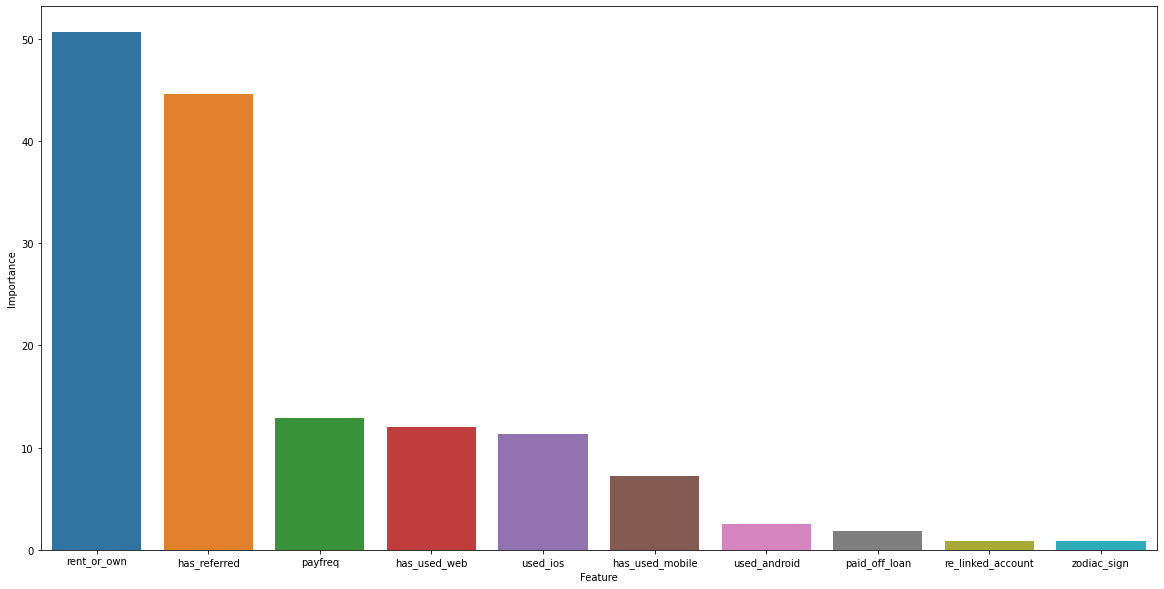

In [135]:
#(Univariate Method)
fs =  SelectKBest(score_func=chi2, k='all')
fs.fit(X_fs[categoricals],y_fs)
X_fs[categoricals] = fs.fit_transform(X_fs[categoricals],y_fs)
fs_cat = select_and_plot(fs.scores_, X_fs[categoricals], n=10)

In [136]:
fs_cat

,Feature,Importance
0,rent_or_own,50.64
1,has_referred,44.62
2,payfreq,12.92
3,has_used_web,12.03
4,used_ios,11.32
5,has_used_mobile,7.24
6,used_android,2.49
7,paid_off_loan,1.82
8,re_linked_account,0.90
9,zodiac_sign,0.87


In [443]:
#Numerical features 

In [137]:
from sklearn.feature_selection import f_classif

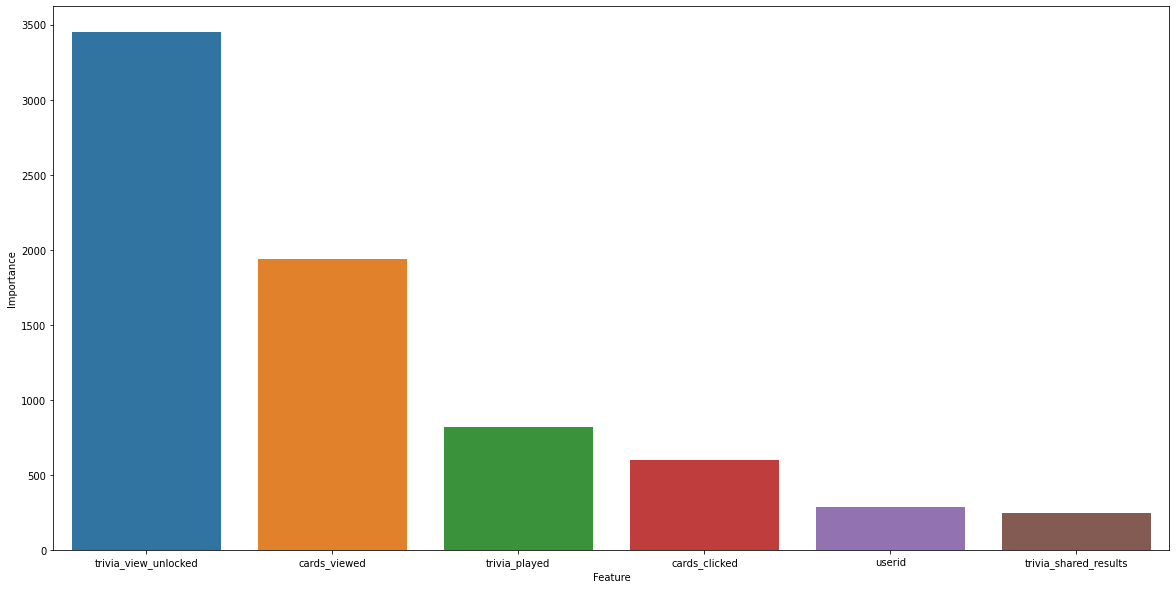

In [138]:
#ANOVA
fs_ = SelectKBest(score_func=f_classif, k='all')
X_fs[numericals] = fs_.fit_transform(X_fs[numericals], y_fs)
fs_num = select_and_plot(fs_.scores_, X_fs[numericals], n=6)

In [139]:
fs_num

,Feature,Importance
0,trivia_view_unlocked,3449.39
1,cards_viewed,1939.30
2,trivia_played,819.19
3,cards_clicked,595.63
4,userid,282.52
5,trivia_shared_results,244.01
6,age,176.77
7,cards_share,105.96
8,cards_not_helpful,18.72
9,cards_helpful,0.99


In [472]:
## RFE (Multivariate Method)

In [184]:
from sklearn.feature_selection import RFE

In [185]:
classifier_fs = RandomForestClassifier()

In [186]:
rfe = RFE(classifier_fs, 20)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [187]:
rfe = rfe.fit(X_train, y_train)

In [188]:
print(rfe.support_)

[ True  True False  True  True  True  True False  True False False  True
 False  True  True  True  True  True False  True False False False False
 False False False  True False  True  True  True False False False False
 False  True False  True]


In [190]:
X_train.columns[rfe.support_]

Index(['userid', 'age', 'rent_or_own_R', 'trivia_played',
       'trivia_shared_results', 'trivia_view_unlocked', 'cards_viewed',
       'cards_clicked', 'has_used_web', 'used_android', 'used_ios',
       'more_than_one_mobile_device', 'payfreq_Bi-Weekly', 'payfreq_Weekly',
       'zodiac_sign_Aquarius', 'zodiac_sign_Cancer', 'zodiac_sign_na',
       'zodiac_sign_Leo', 'un_linked_account', 'has_referred'],
      dtype='object')

In [191]:
rfe.ranking_

array([ 1,  1, 12,  1,  1,  1,  1, 11,  1, 16, 20,  1, 19,  1,  1,  1,  1,
        1,  7,  1, 10, 21, 15, 14, 18, 13,  5,  1,  2,  1,  1,  1,  8,  3,
        4,  6,  9,  1, 17,  1])

### Etape 4 : Construire des modèles prédictifs et les entrainer

#### Logistic Regression : 

In [419]:
from sklearn.linear_model import LogisticRegression

In [445]:
classifier = LogisticRegression()

In [446]:
classifier.fit(X_train, y_train, )

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [447]:
y_pred = classifier.predict(X_test)

In [448]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [449]:
cm = confusion_matrix(y_test, y_pred)

In [450]:
accuracy_score(y_test, y_pred)

0.6496117581808097

In [451]:
precision_score(y_test, y_pred)

0.5996046562705908

In [452]:
recall_score(y_test, y_pred)

0.4579768495218923

In [453]:
f1_score(y_test, y_pred)

0.5193075898801598

In [454]:
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))

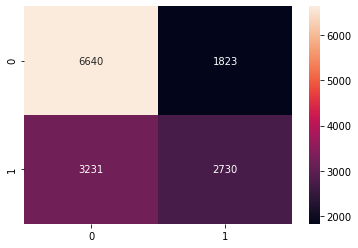

In [455]:
sns.heatmap(df_cm, annot=True, fmt='g')

#### SVM Classifier

In [422]:
from sklearn.svm import SVC

In [423]:
sv_classifier = SVC()

In [424]:
sv_classifier.fit(X_train,y_train)

SVC()

In [426]:
y_pred_svc = sv_classifier.predict(X_test)

In [456]:
accuracy_score(y_test, y_pred_svc), precision_score(y_test, y_pred_svc), f1_score(y_test, y_pred_svc), recall_score(y_test, y_pred_svc) 

(0.6780366056572379,
 0.6308364792370356,
 0.5775877751500818,
 0.5326287535648381)

In [428]:
cm_svc = confusion_matrix(y_test, y_pred_svc)

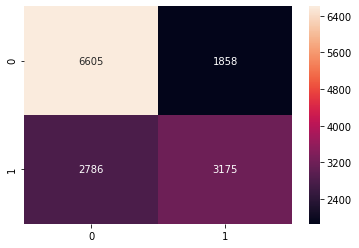

In [429]:
sns.heatmap(cm_svc, annot=True, fmt='g')

#### Random Forest Classifier 

In [430]:
from sklearn.ensemble import RandomForestClassifier

In [431]:
rf_classifier = RandomForestClassifier()

In [432]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [433]:
y_pred_rf = rf_classifier.predict(X_test)

In [175]:
accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf) 

(0.7181087077093733, 0.7157822819403324, 0.607225656877898, 0.5272605267572555)

In [434]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

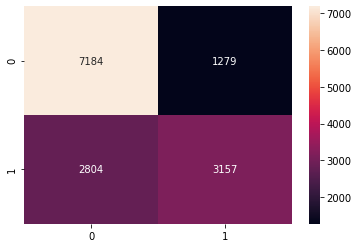

In [435]:
sns.heatmap(cm_rf, annot=True, fmt='g')

In [462]:
accuracy_list = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_rf)]

In [463]:
precision_scores = [precision_score(y_test, y_pred), precision_score(y_test, y_pred_svc), precision_score(y_test, y_pred_rf)]

In [464]:
recall_scores = [recall_score(y_test, y_pred), recall_score(y_test, y_pred_svc), recall_score(y_test, y_pred_rf)]

In [465]:
models = ['Logistic Regression', 'SVM', 'Random Forest']

In [466]:
eval_dict = {"Algo" : models, "Accuracy" : accuracy_list, "Precision" : precision_scores, "Recall" : recall_scores}

In [467]:
eval_df = pd.DataFrame.from_dict(eval_dict)

In [470]:
eval_df.set_index('Algo', inplace=True)

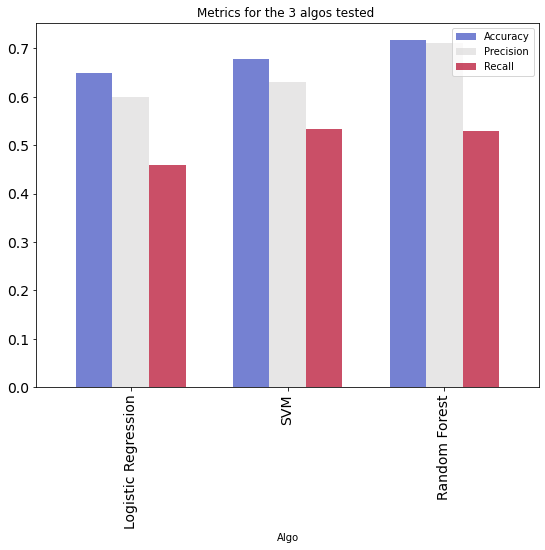

In [476]:
eval_df.plot(kind='bar', width=0.7, colormap='coolwarm', use_index=True, stacked=False, alpha=0.7, fontsize=14, grid=False, title=("Metrics for the 3 algos tested "), figsize=(9,6.7))

### Etape 5 : Tune the candidat model  (Random Forest)

In [176]:
from sklearn.model_selection import cross_val_score

In [177]:
accuracies = cross_val_score(estimator = rf_classifier, X = X_train, y= y_train, cv=10)

In [178]:
accuracies.mean()

0.7122565750150752

In [181]:
pd.concat([pd.DataFrame(X_train.columns, columns=['features']), pd.DataFrame(np.transpose(classifier.coef_), columns=['coef'])],axis=1 )

,features,coef
0,userid,-0.072289
1,age,-0.176666
2,rent_or_own_O,-0.098149
3,rent_or_own_R,0.061966
4,trivia_played,-0.085905
5,trivia_shared_results,0.029858
6,trivia_view_unlocked,-0.713423
7,cards_share,0.031631
8,cards_viewed,-0.169387
9,cards_helpful,-0.010948


In [ ]:
--------- Random Forest Hyper Paramter Tuning ------------- 

In [205]:
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

#### Random Hyperparameter Grid

In [206]:
from sklearn.model_selection import RandomizedSearchCV

In [210]:
n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]

In [211]:
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [212]:
max_features = ['auto', 'sqrt']

In [213]:
max_depth = [int(x) for x in np.linspace(10, 100, 11)]

In [214]:
max_depth

[10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100]

In [215]:
min_samples_split = [2, 5, 10]

In [216]:
min_samples_leaf = [1, 2, 4]

In [217]:
bootstrap = [True, False]

In [218]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [219]:
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [220]:
rf_tuned = RandomForestClassifier()

In [221]:
rf_random = RandomizedSearchCV(estimator= rf_tuned, param_distributions= random_grid, n_iter=100, cv=3, random_state=101, verbose=2, n_jobs=-1)

In [222]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 16.6min
//anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 60.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 126.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=101, verbose=2)

In [223]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 64,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1800}

In [224]:
rf_random.best_score_

0.7066409702703137

In [225]:
y_pred_final = rf_random.predict(X_test)

In [226]:
#Model Random Forest Tuned
accuracy_score(y_test, y_pred_final), precision_score(y_test, y_pred_final), f1_score(y_test, y_pred_final), recall_score(y_test, y_pred_final) 

(0.7224764281752635, 0.7180400890868597, 0.6169744522055306, 0.540848850863949)

In [227]:
#Model Random Forest Untuned
accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf) 

(0.7181087077093733, 0.7157822819403324, 0.607225656877898, 0.5272605267572555)

In [131]:
import pickle

In [132]:
filename = 'finalized_model.pkl'

In [ ]:
pickle.dump(rf_random, open(filename, 'wb'))

In [216]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7224764281752635


In [338]:
loaded_model.n_features_in_

40

In [217]:
y_pred = loaded_model.predict(X_test)

In [218]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [225]:
X_test_original = X_test.copy()

In [226]:
X_test_original[to_scale] = scaler.inverse_transform(X_test[to_scale])

In [248]:
data_ = pd.read_csv('new_churn_data.csv')

In [249]:
test_data = data_[data_['userid'].isin(X_test_original['userid'].apply(int).values)].copy()

In [253]:
test_data.drop('churn', axis=1, inplace=True)

In [254]:
test_data.to_csv('test_data.csv')

In [229]:
final_results = pd.concat([X_test_original['userid'], y_test, pd.DataFrame(y_pred)], axis=1).dropna()

In [232]:
final_results.head(20)

,userid,churn,0
0,0.0,1.0,0.0
5,20.0,1.0,0.0
9,30.0,1.0,0.0
11,35.0,1.0,0.0
13,37.0,1.0,1.0
15,41.0,1.0,0.0
16,42.0,1.0,0.0
17,46.0,1.0,0.0
18,47.0,1.0,0.0
31,93.0,1.0,0.0


## Etape 6 : Deploiement via Flask & Gunicorn 

Le code suivant contient le mapping, l'implementation du model et le pretraitement des donnees a predire. (app.py)

In [ ]:
import numpy as np
import pandas as pd
from flask import Flask, request,render_template, redirect, url_for 
from flask_cors import CORS
import os
import pickle
import flask
import os


app = Flask(__name__)
#CORS(app)
from dictconv import DictionaryConverter

app.url_map.converters['dict'] = DictionaryConverter
#app=flask.Flask(__name__,template_folder='templates')



################### Import Estimators ######################

with open('binary_encoder.pickle', 'rb') as bin_enc:
    binary_enco = pickle.load(bin_enc)

#model = pickle.load(open(filename, "rb"))

with open('nominal_encoder.pickle', 'rb') as ohe_enc:
    ohe_enco = pickle.load(ohe_enc)

with open('oneormore_encoder.pickle', 'rb') as oom_enc:
    oom_enco = pickle.load(oom_enc)

with open('payfreq_encoder.pickle', 'rb') as pf_enc:
    pf_enco = pickle.load(pf_enc)

with open('scaler.pickle', 'rb') as scl:
    scaler = pickle.load(scl)

with open('finalized_model.pkl', 'rb') as clf:
    model = pickle.load(clf)

################### Routing / Mapping ####################

@app.route('/')
def main():
    return render_template('index.html')



@app.route('/predict',methods=['GET','POST'])

def predict():

        if request.method == 'POST' : 

            path=request.form
            
            #print(type(path))    
            return redirect(url_for('churn', usr=path))
 
        else : 
            return render_template('predict.html')


@app.route('/predict/<dict:usr>')

def churn(usr) :

    path = usr['path']
    target = usr['target']

    X_test = pd.read_csv(path)
    X_test.drop([target, 'Unnamed: 0', 'cash_back_engagement', 'trivia_view_results'], axis=1 , inplace=True)
    ordinals = ['payfreq', 'more_than_one_mobile_device']
    binaries = ['has_used_mobile',
    'has_used_web',
    'used_android',
    'used_ios',
    'loan_pending',
    'withdrawn_application',
    'paid_off_loan',
    'did_not_accept_funding',
    'un_linked_account',
    're_linked_account',
    'has_referred']

    nominals = ['rent_or_own', 'zodiac_sign']

    X_test = binary_enco.transform(X_test)
    X_test = ohe_enco.transform(X_test)
    X_test.drop('rent_or_own_na', inplace=True, axis=1)
    X_test.drop('zodiac_sign_Virgo', inplace=True, axis=1)

    X_test = oom_enco.transform(X_test)
    X_test = pf_enco.transform(X_test)

    X_test.drop('payfreq_na', inplace=True, axis=1)

    to_scale = ['userid', 'age',
    'trivia_played',
    'trivia_shared_results',
    'trivia_view_unlocked',
    'cards_share',
    'cards_viewed',
    'cards_helpful',
    'cards_not_helpful',
    'cards_clicked',
    'more_than_one_mobile_device']

    X_test[to_scale] = scaler.transform(X_test[to_scale])

    y_pred = model.predict(X_test)

    
    X_test_original = X_test.copy()
    X_test_original[to_scale] = scaler.inverse_transform(X_test_original[to_scale])

    final_results = pd.concat([X_test_original['userid'].apply(int), pd.DataFrame(y_pred)], axis=1)



    preview = final_results.head(10).to_html()

    return preview




if __name__=="__main__":
    port=int(os.environ.get('PORT',5000))
    app.run(port=port,debug=True,use_reloader=False)

Le code suivant presente la partie (Front-end), on s'est limite au HTML : (base.html) & (predict.html)

- base.html 

<!doctype html>
<html>
<head>
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">
    <title>{% block title %}{% endblock %}</title>
</head>

<body>

        <!-- As a link -->
    <nav class="navbar navbar-light bg-light">
    <a class="navbar-brand" href="#">Churn Prediction</a>
    </nav>

    <!-- As a heading -->
    <nav class="navbar navbar-light bg-light">
      <span class="navbar-brand mb-0 h1">Usecase : Fintech Company - EHTP ML Project</span>
    </nav>
    {% block content %}
    {% endblock %}
    <script src="https://code.jquery.com/jquery-3.3.1.slim.min.js" integrity="sha384-q8i/X+965DzO0rT7abK41JStQIAqVgRVzpbzo5smXKp4YfRvH+8abtTE1Pi6jizo" crossorigin="anonymous"></script>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.7/umd/popper.min.js" integrity="sha384-UO2eT0CpHqdSJQ6hJty5KVphtPhzWj9WO1clHTMGa3JDZwrnQq4sF86dIHNDz0W1" crossorigin="anonymous"></script>
    <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/js/bootstrap.min.js" integrity="sha384-JjSmVgyd0p3pXB1rRibZUAYoIIy6OrQ6VrjIEaFf/nJGzIxFDsf4x0xIM+B07jRM" crossorigin="anonymous"></script>
</body>
</html>

- predict.html

{% extends "base.html" %}

{% block title %}EHTP Project{% endblock %}

{% block content %}

<form action="#" method="post">
	<p>Enter the path when you have your data to predict :</p>
	<p><input type="text" name="path" /></p>
	<p><input type="text" name="target" /></p>
	<p><input type="submit" value="Predict churn" /></p>
	
</form>


{% endblock %}

le code suivant implemente une classe pour pouvoir extraire les donnees du formulaire HTML dans un format 'dictionnary' : (dictconv.py)

In [ ]:
from werkzeug.routing import BaseConverter

class DictionaryConverter(BaseConverter):
    """Convert python dictionary to URL query string and back."""

    def to_python(self, value):
        d = {}
        for item in value.split('&'):
            k, v = item.split('=')
            if k != 'csrf_token':
                d[k] = v
        return d

    def to_url(self, values):
        pairs = []
        for k in values:
            #don't expose the csrf token in the query string
            if k != 'csrf_token':
                pairs.append('{}={}'.format(k, values[k]))
        return '&'.join(BaseConverter.to_url(self, value=pair) for pair in pairs)